# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    (optimize period, smas, pct_stop_loss, or margin)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbols = {'SP500' : 'IVV',  'BONDS' : 'BND', 'EXUS' : 'VEU'}
symbols = {'SP500' : 'SPY',  'BONDS' : 'AGG', 'EXUS' : 'EFA'}

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()
#end = datetime.datetime(2019, 1, 1)
# num months lookback
lookback = None

use_cache = False

Define Optimizations

In [4]:
# pick one
optimize_lookback = True

# define high low trade periods ranges
if optimize_lookback:
    Xs = range(3, 18+1, 1)
    Xs = [str(X) for X in Xs]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print("{0}".format(X), end=" ")
    if optimize_lookback:
        strategies[X] = strategy.Strategy(symbols, capital, start, end, lookback=int(X),
                                          margin=1, use_cache=True)
    strategies[X].run()
    strategies[X].rlog, strategies[X].tlog, strategies[X].dbal = strategies[X].get_logs()
    strategies[X].stats = strategies[X].get_stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
annual_return_rate,8.06,7.24,5.27,6.94,7.10,9.15,6.58,6.18,6.63,4.78,4.74,6.48,4.89,6.87,9.30,8.65
max_closed_out_drawdown,-22.90,-23.10,-37.18,-39.31,-34.01,-19.34,-33.44,-33.51,-29.88,-35.05,-35.73,-36.31,-39.38,-33.64,-22.44,-22.44
drawdown_annualized_return,-2.84,-3.19,-7.06,-5.66,-4.79,-2.11,-5.08,-5.43,-4.51,-7.33,-7.54,-5.60,-8.05,-4.90,-2.41,-2.59
drawdown_recovery,-1.06,-0.89,-2.15,-1.51,-1.51,-0.26,-0.09,-0.09,-2.22,-1.51,-1.51,-2.15,-1.51,-0.09,-0.94,-0.94
best_month,16.52,16.50,16.52,16.53,16.53,10.63,12.59,12.61,10.36,12.71,12.63,14.10,12.67,12.69,13.92,12.42
worst_month,-15.96,-15.94,-30.75,-30.87,-30.75,-16.01,-30.72,-30.79,-16.27,-30.98,-30.83,-30.87,-30.90,-30.91,-16.27,-16.28
sharpe_ratio,0.68,0.62,0.43,0.54,0.55,0.75,0.51,0.48,0.54,0.39,0.39,0.49,0.39,0.52,0.70,0.67
sortino_ratio,0.79,0.74,0.49,0.62,0.64,0.92,0.58,0.55,0.65,0.44,0.44,0.55,0.44,0.60,0.85,0.81
monthly_std,3.16,3.08,3.52,3.51,3.44,2.98,3.53,3.55,3.25,3.64,3.58,3.62,3.69,3.64,3.40,3.35
pct_time_in_market,99.51,99.51,99.51,99.51,99.51,99.51,99.51,99.51,99.51,99.51,99.51,99.51,99.51,99.51,99.51,99.51


Bar graphs

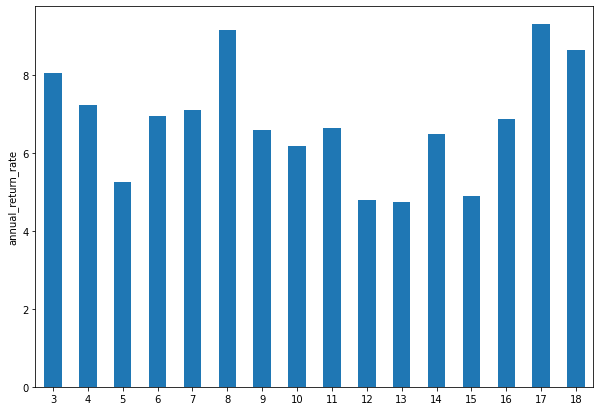

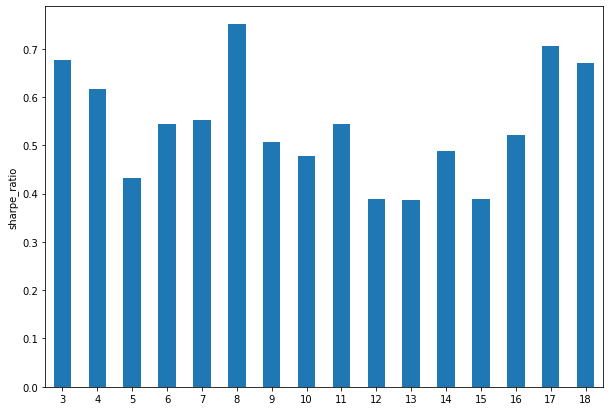

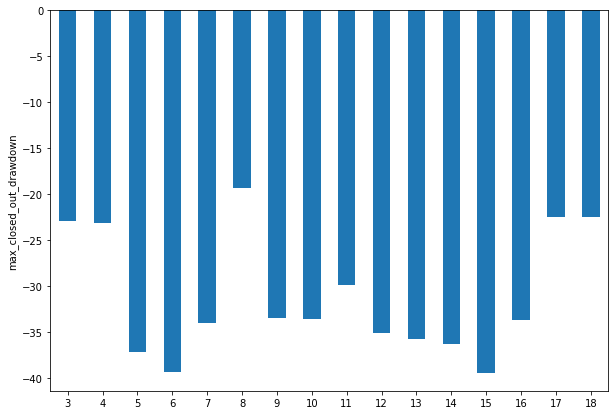

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark('SPY', capital, s.start, s.end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2005-03-04 00:00:00 BUY  81 SPY @ 122.73
2020-07-24 00:00:00 SELL 81 SPY @ 320.88


Equity curve

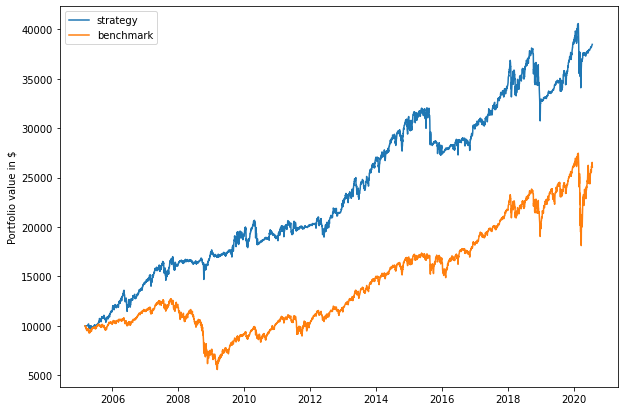

In [9]:
if optimize_lookback: Y = '8'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)

In [10]:
def plot_equity_curves(strategies):
    """
    Plot Equity Curve: multiple equity curves on same plot
    Arguement is daily balance.
    """
    fig = plt.figure(figsize=(16,12))
    axes = fig.add_subplot(111, ylabel='Portfolio value in $')
    for strategy in strategies:
        axes.plot(strategy.dbal['close'], label=strategy.lookback)

    plt.legend(loc='best')

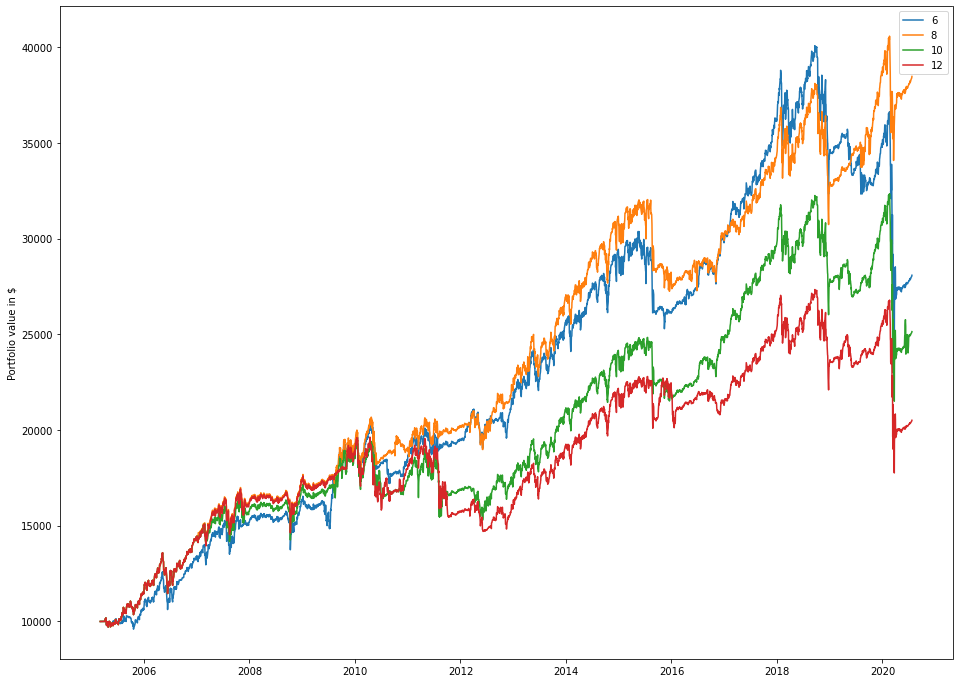

In [11]:
plot_equity_curves(strategies[3:10:2])